# DLSP25U: Introduction to Deep Learning

**Name:** Hailemariam Mersha


**Instructions:**

In this notebook, you will be asked to write code and answer questions.  
Place all responses under the **Solution** headers.

---

This first assignment is aimed at coding a perceptron from scratch in order to learn how this
simple but powerful linear binary classifier works. Hereafter we import some useful libraries and set the random seed for reproducibility.

In [102]:
import numpy as np
import matplotlib.pyplot as plt

SEED = 0
np.random.seed(SEED)

## The perceptron

The perceptron is the simplest form of a neural network used for the classification of data said to be linearly separable (i.e., data that lie on opposite sides of a hyperplane). It consists of a linear combination of the input features, followed by a hard limiter like the heaviside function or the sign function defined as:
$$
\begin{equation*}
    \text{Heaviside}(x) = \begin{cases} 1 & \text{if } x \geq 0 \\ 0 & \text{if } x < 0 \end{cases}
\end{equation*}
$$
or, using the Iverson bracket notation:
$$
\begin{equation*}
    \text{Heaviside}(x) = [x \geq 0]
\end{equation*}
$$

<p align="center">
  <img src="https://www.intmath.com/laplace-transformation/svg/svgphp-unit-step-functions-definition-1a-s0.svg" alt="Image description" />
</p>

As a consequence we can formalize the perceptron predictor in the following way.

Let $x$ be the object we want to classify and $\boldsymbol{f}(x)$ be the feature vector in $\mathbb{R}^N$. This means that $\boldsymbol{f}$ *extracts* the features from the object $x$, i.e. $\boldsymbol{f}(x)$ is the so-called *feature extractor*.
Moreover, let $\boldsymbol{w} \in \mathbb{R}^N$ be the synaptic weights vector, $b \in \mathbb{R}$ the externally applied bias term and $[x \geq 0]$ the hard limiter function. The perceptron predictor is defined as:
$$
\begin{equation*}
    \tilde{y} = [\boldsymbol{w}^\top \boldsymbol{f}(x) + b \geq 0]
\end{equation*}
$$
Often, we will include the bias term into the weights vector by adding a constant 1 to the input vector $\mathbf{x}$, so that the perceptron predictor becomes:
$$
\begin{equation*}
    \tilde{y} = [\boldsymbol{w}^\top \boldsymbol{f}(x) \geq 0]
\end{equation*}
$$

The goal is to classify correctly the input data in the classes $\mathcal{C}_1$ and $\mathcal{C}_2$.

The update rule for the perceptron is:
$$
    \boldsymbol{w} \leftarrow \boldsymbol{w}
$$
if the predicted label is correct, otherwise:
$$
\begin{equation*}
    \boldsymbol{w} = \begin{cases} \boldsymbol{w} - \boldsymbol{f}(x) \quad \text{ if } \boldsymbol{w}^\top \boldsymbol{f}(x) > 0
    \\ \boldsymbol{w} + \boldsymbol{f}(x) \quad \text{ if } \boldsymbol{w}^\top \boldsymbol{f}(x) \leq 0 \end{cases}
\end{equation*}
$$

One can rewrite the update rule more elengantly in the following way:
$$
\begin{equation*}
    \boldsymbol{w} = \boldsymbol{w} + (y - \tilde{y}) \boldsymbol{f}(x)
\end{equation*}
$$

where $y$ is the true label, i.e. the desired output of the perceptron. From now on we will compact the notation by denoting $\boldsymbol{f} = \boldsymbol{f}(x)$. 

The first task is to implement the perceptron algorithm in Python. Hereafter you have a template for the class `Perceptron`. You have to implement the methods `train` and `predict`.
- the method `train` should implement the perceptron learning algorithm and take as input the training dataset. Then process all the pairs $(\boldsymbol{f}, y)$ once updating the weights accordingly
- the method `predict` should take as input a data point `x` and return the predicted label

In [103]:
class NotImplementedPerceptron:
    def __init__(self, n_features):
        # You can either include the bias term in the weights vector or not
        # but consider adapting the predict method accordingly
        self.w = np.zeros(n_features)
        self.b = 0

    def predict(self, f):
        raise NotImplementedError

    def train(self, F, y):
        raise NotImplementedError

**Solution [4 Points]**

In [104]:
# TODO
class Perceptron:
    def __init__(self, n_features):
        # You can either include the bias term in the weights vector or not
        # but consider adapting the predict method accordingly
        self.w = np.zeros(n_features)
        self.b = 0

    def predict(self, f):
        # weight transpose times feature vector + bais > 0, return 1
        if((np.dot(self.w, f) + self.b) >= 0):
            return 1
        else:
            return 0
    def train(self, F, y):
        #new weight is old weight + (y - predict(self, F[i])) F[i] each feature or coordinate in this case
        for i in range(len(F)):
            self.w = self.w + (y[i] - self.predict(F[i])) * F[i]
            self.b = self.b + (y[i] - self.predict(F[i]))

## Exercise 1

### 1.1 Synthetic dataset generation

We will generate a dataset $D = \{ \boldsymbol{f}_i, y_i \}_{i=1}^{N=200}$ where $\boldsymbol{f}_i \in \mathbb{R}^2$ and $y_i \in \{0, 1\}$.
The dataset will be generated in the following way:
$$\boldsymbol{f}_i \sim \begin{cases}
\mathcal{N}\left(\begin{pmatrix}1 \\ 0\end{pmatrix}, \sigma^2 \mathbb{I}_2 \right) & \text{if } y_i = 1 \\
\mathcal{N}\left(\begin{pmatrix}-1 \\ 0\end{pmatrix}, \sigma^2 \mathbb{I}_2 \right) & \text{if } y_i = 0
\end{cases}
$$

The function `generate_dataset` does exactly this and you do not have to modify it.

In [105]:
def generate_dataset(
    n_samples = 200,
    sigma = 1,
    mean_positive = np.array([1, 0]),
    mean_negative = np.array([-1, 0]),
):
    # Generate covariance matrix
    covariance_matrix = sigma**2 * np.eye(2)

    # Generate labels
    y = np.random.choice([0, 1], size=n_samples)

    # Generate data points based on labels
    F = np.array([
        np.random.multivariate_normal(mean_positive, covariance_matrix) if label == 1 
        else np.random.multivariate_normal(mean_negative, covariance_matrix) 
        for label in y
    ])

    return F, y

An example of a generated dataset is shown below.

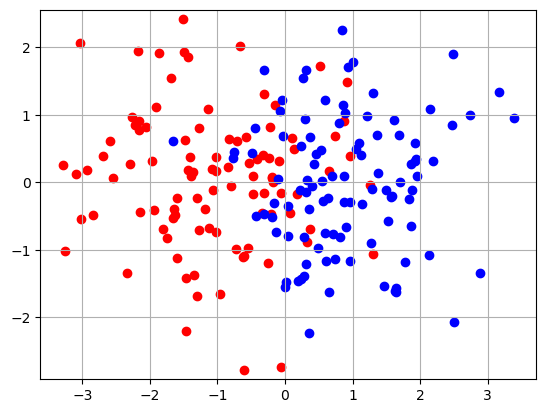

In [106]:
F, y = generate_dataset(sigma=1)
plt.scatter(F[y == 0][:, 0], F[y == 0][:, 1], color='red')
plt.scatter(F[y == 1][:, 0], F[y == 1][:, 1], color='blue')
plt.grid()
plt.axis('equal')
plt.show()

### 1.2 Computational complexity

Before implementing the perceptron, let's evaluate the computational complexity of the perceptron in terms of arithmetic operations per iteration.
What is the worst case asymptotic time complexity of the perceptron algorithm?

**Solution [2 Points]**

TODO


### 1.2 Computational Complexity

#### Per-sample cost
- For one sample, we compute a dot product $w \cdot x$, which costs $O(d)$.  
- If the sample is misclassified, we update the $d$-dimensional weight vector, also costing $O(d)$.  
- **Total per sample:** $O(d)$.

#### Per-iteration cost (one full pass over the training set)
- With $n$ samples, one complete pass (epoch) requires $O(nd)$ operations.  

#### Worst-case total complexity
- In the worst case, the perceptron may require many iterations until convergence.  
- Thus, the total worst-case complexity is higher than $O(nd)$ and depends on dataset separability and convergence guarantees.  


### 1.3 Decision boundary

The decision boundary of the perceptron is the hyperplane defined by the equation $\boldsymbol{w}^\top \boldsymbol{f} = 0$ that splits (or tries to) the data points in two regions.
When working with two-dimensional data, the decision boundary is an easily visualizable line.

Generate a random dataset with $N=200$ samples and $\sigma=0.5$, then plot the data points and the decision boundary of the perceptron.

**Solution [2 Points]**

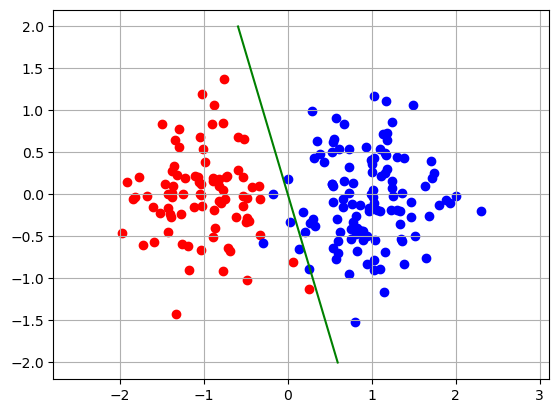

In [107]:
# TODO
F, y = generate_dataset(sigma=0.5)
newPerceptron = Perceptron(2)
newPerceptron.train(F,y)
f1 = []
f2 = [-2,2] # give random values for f2 to calculate f1 using w1f1 + w2f2 = -b, where we find the decision boundary 
for i in f2:
    f1.append((-newPerceptron.b - (newPerceptron.w[1]*i))/newPerceptron.w[0])
plt.plot(f1,f2, color ="green")
plt.scatter(F[y == 0][:, 0], F[y == 0][:, 1], color='red')
plt.scatter(F[y == 1][:, 0], F[y == 1][:, 1], color='blue')
plt.grid()
plt.axis('equal')
plt.show()

### 1.4 Error analysis

Now we focus on the error analysis of the predictions of the perceptron.

#### 1.4.1 Variance in the inputs

Consider three different values of $\sigma = \{0.04, 0.5, 0.75\}$. For each value of $\sigma$:
1. Run the perceptron over 50 randomly generated datasets
2. For each of these datasets, train the perceptron, make it predict the labels of the same data points and compute the mean of the errors using as error function $e(y, \tilde{y}) = \left[ y \neq \tilde{y} \right]$. The mean of the errors can be estimated with the `np.mean` function.
3. For each of the sigma values, print the mean and the standard deviation of the errors. Then plot the distribution of the errors for each value of $\sigma$. What happens when $\sigma$ increases? What is the reason for this?

**Solution [3 Points]**

sigma = 0.04
Errors:  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Mean Errors:  0.0
STD of Errors:  0.0


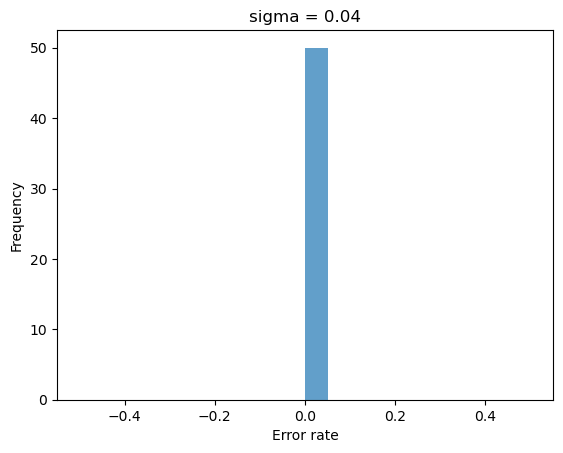

sigma = 0.5
Errors:  [0.025, 0.035, 0.025, 0.01, 0.03, 0.025, 0.035, 0.12, 0.02, 0.025, 0.035, 0.055, 0.025, 0.035, 0.01, 0.0, 0.02, 0.065, 0.015, 0.04, 0.065, 0.015, 0.03, 0.01, 0.02, 0.045, 0.025, 0.03, 0.035, 0.025, 0.0, 0.015, 0.08, 0.02, 0.065, 0.02, 0.055, 0.04, 0.01, 0.085, 0.01, 0.03, 0.01, 0.07, 0.045, 0.005, 0.125, 0.045, 0.025, 0.005]
Mean Errors:  0.0342
STD of Errors:  0.026876755756601277


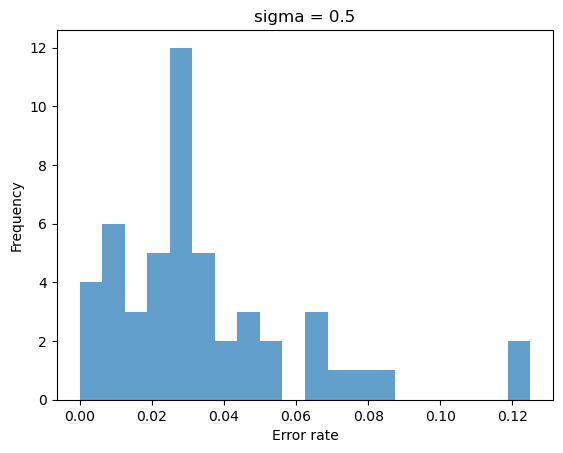

sigma = 0.75
Errors:  [0.08, 0.2, 0.105, 0.145, 0.11, 0.37, 0.115, 0.135, 0.085, 0.125, 0.22, 0.1, 0.06, 0.155, 0.12, 0.185, 0.165, 0.16, 0.07, 0.145, 0.075, 0.12, 0.085, 0.545, 0.155, 0.125, 0.14, 0.05, 0.125, 0.13, 0.07, 0.13, 0.06, 0.05, 0.19, 0.145, 0.165, 0.125, 0.085, 0.18, 0.085, 0.1, 0.105, 0.155, 0.12, 0.105, 0.13, 0.14, 0.14, 0.14]
Mean Errors:  0.1364
STD of Errors:  0.07801948474579924


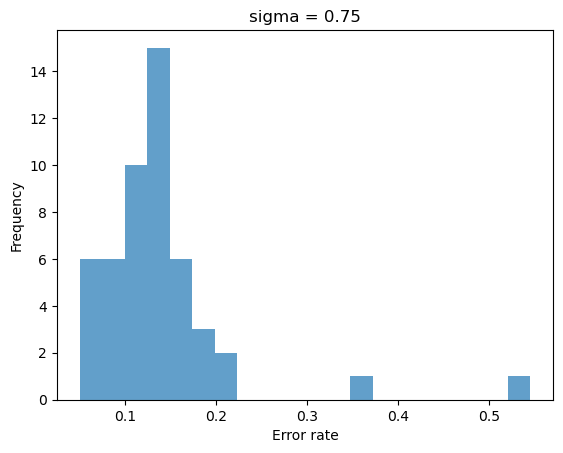

In [108]:
# TODO
data = {}
for s in [0.04, 0.5, 0.75]:
    mean_errors = []
    data[s] = [mean_errors]
    for i in range(50):
        F, y = generate_dataset(sigma = s)
        p = Perceptron(2)
        p.train(F,y)
        error = []
        for f in range(200):
            if(y[f] != p.predict(F[f])):
                error.append(1)
            else:
                error.append(0)
        e1 = np.mean(error)
        mean_errors.append(e1)  
    data[s].append(mean_errors)

all_errors = np.concatenate([data[s][0] for s in [0.04, 0.5, 0.75]])
xmin, xmax = all_errors.min(), all_errors.max()

for s in [0.04, 0.5, 0.75]:
    print(f"sigma = {s}")
    print("Errors: ", data[s][0])
    print("Mean Errors: ", np.mean(data[s][0]))
    print("STD of Errors: ", np.std(data[s][0]))
    plt.hist(data[s][0], bins=20, alpha=0.7)
    plt.title(f"sigma = {s}")
    plt.xlabel("Error rate")
    plt.ylabel("Frequency")
    #plt.xlim(xmin, xmax) 
    plt.show()


#### Therefore, as the value of σ increases, the error of the perceptron classifier also increases. When σ is small (e.g., 0.04), the data points are tightly clustered and nearly linearly separable, allowing the perceptron to correctly classify most examples with very low error. However, as σ grows (e.g., 0.5 or 0.75), the variance of the data increases, which causes greater overlap between classes. This overlap makes the dataset less linearly separable, and since the perceptron is a linear classifier, it cannot capture the more complex decision boundaries. As a result, the classification error rises with higher σ values

### 1.4.2 Variance in the labels
Generate one more dataset with $\sigma = 0.15$. To make our dataset noisier we consider the possibility of flipping some labels. Consider these label flipping probabilities: $p = \{0.05, 0.15, 0.25\}$.
Repeat the previous experiment keeping the newly generateed dataset fixed, but flipping the labels with the given probabilities.
Print the errors and plot the distribution of the error statistic. What can we say about the error distribution when $p$ increases?

*Hint*: write a function `flip_labels` that takes as input the labels and the probability $p$ and returns the flipped labels and then use it in the experiment.

**Solution [3 Points]**

Flip prob = 0.05
Errors [0.045, 0.505, 0.055, 0.03, 0.045, 0.055, 0.035, 0.06, 0.07, 0.055, 0.095, 0.1, 0.035, 0.035, 0.055, 0.45, 0.04, 0.05, 0.055, 0.04, 0.16, 0.07, 0.05, 0.025, 0.055, 0.035, 0.08, 0.06, 0.045, 0.07, 0.045, 0.11, 0.04, 0.045, 0.96, 0.055, 0.06, 0.06, 0.045, 0.04, 0.055, 0.055, 0.5, 0.07, 0.04, 0.02, 0.095, 0.13, 0.04, 0.07]
Mean Errors 0.10190000000000002
STD 0.16116417095620228


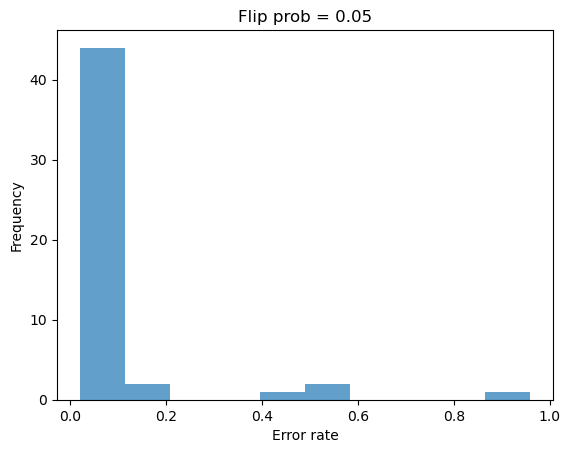

Flip prob = 0.15
Errors [0.115, 0.86, 0.14, 0.115, 0.17, 0.16, 0.13, 0.175, 0.505, 0.885, 0.18, 0.13, 0.49, 0.12, 0.17, 0.15, 0.835, 0.12, 0.17, 0.15, 0.54, 0.235, 0.14, 0.175, 0.78, 0.495, 0.175, 0.185, 0.85, 0.19, 0.185, 0.125, 0.145, 0.14, 0.155, 0.15, 0.165, 0.125, 0.47, 0.155, 0.12, 0.195, 0.87, 0.165, 0.13, 0.505, 0.16, 0.14, 0.13, 0.17]
Mean Errors 0.27870000000000006
STD 0.23910836455465126


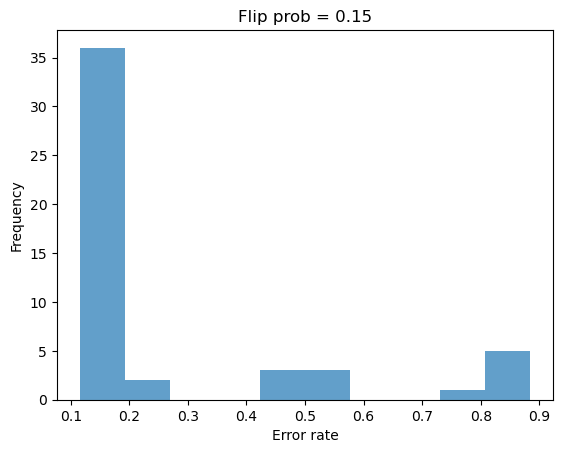

Flip prob = 0.25
Errors [0.255, 0.17, 0.305, 0.505, 0.73, 0.24, 0.71, 0.465, 0.285, 0.77, 0.17, 0.265, 0.255, 0.54, 0.25, 0.255, 0.275, 0.235, 0.22, 0.275, 0.245, 0.765, 0.26, 0.245, 0.26, 0.225, 0.75, 0.25, 0.295, 0.265, 0.725, 0.52, 0.265, 0.485, 0.195, 0.685, 0.24, 0.775, 0.265, 0.275, 0.23, 0.305, 0.21, 0.245, 0.28, 0.445, 0.255, 0.625, 0.285, 0.255]
Mean Errors 0.36599999999999994
STD 0.1887749983445901


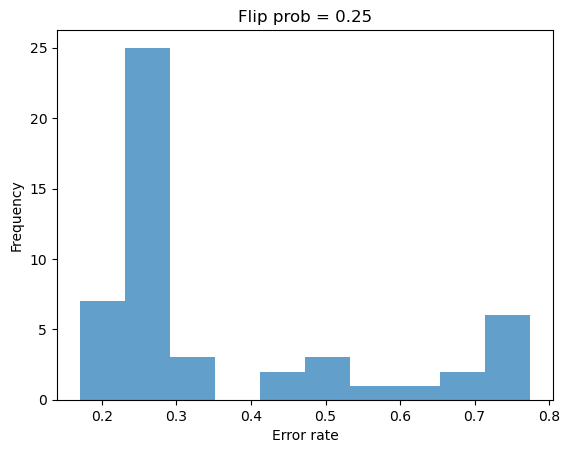

In [109]:
# TODO
F, y = generate_dataset(sigma=0.15)
def flip_labels(y, p):
    """Flip labels in y with probability p."""
    y_flipped = y.copy()
    for i in range(len(y)):
        if np.random.uniform() < p:   # event happens with probability p
            y_flipped[i] = 1 - y_flipped[i]
    return y_flipped
flip_probs = [0.05, 0.15, 0.25]
data_flips = {}

for p_flip in flip_probs:
    mean_errors = []
    data_flips[p_flip] = [mean_errors]
    
    for i in range(50):
        # flip labels on the SAME dataset
        y_flipped = flip_labels(y, p_flip)

        p = Perceptron(2)
        p.train(F, y_flipped)

        error = []
        for f in range(len(y)):
            if y_flipped[f] != p.predict(F[f]):
                error.append(1)
            else:
                error.append(0)

        e1 = np.mean(error)
        mean_errors.append(e1)
    data_flips[p_flip].append(mean_errors)
all_errors = np.concatenate([data_flips[p][0] for p in flip_probs])
xmin, xmax = all_errors.min(), all_errors.max()

for p_flip in flip_probs:
    print(f"Flip prob = {p_flip}")
    print("Errors", data_flips[p_flip][0])
    print("Mean Errors", np.mean(data_flips[p_flip][0]))
    print("STD", np.std(data_flips[p_flip][0]))

    plt.hist(data_flips[p_flip][0], bins=10, alpha=0.7)
    plt.title(f"Flip prob = {p_flip}")
    plt.xlabel("Error rate")
    plt.ylabel("Frequency")
    # plt.xlim(xmin, xmax)
    plt.show()


## Exercise 2

Now we are going to use real world data. We will use the Iris dataset, which is a popular dataset in machine learning. The dataset consists of 50 samples from each of three species of Iris flowers:

0. Iris setosa, *setosa*
1. Iris versicolor, *versicolor*
2. Iris virginica, *virginica*

For each sample, four features are given:

- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm

### 2.1 Load the dataset

The `sklearn` library easily allows us to load the Iris dataset with the function `load_iris` from the `datasets` submodule. Moreover, we split the dataset into a training set and a test set. The `train_test_split` function from `sklearn.model_selection` can be used for this purpose. We split the dataset into 80% training data and 20% test data, making sure that the classes are balanced (see the `stratify` parameter).

**Solution [1 Point]**

In [110]:
# TODO
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 1. Load the dataset
iris = load_iris()
X = iris.data          # features (sepal length, sepal width, petal length, petal width)
y = iris.target        # labels (0=setosa, 1=versicolor, 2=virginica)

print("Feature names:", iris.feature_names)
print("Target names:", iris.target_names)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# 2. Split into training (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Shape of X: (150, 4)
Shape of y: (150,)
Training set size: 120
Test set size: 30


### 2.2 Binary classification

Now, in turn, discard one of the three classes and run the perceptron on the remaining two. 
Then, Compute the accuracy of the perceptron both on the training set and on the test set. Keep track of the three vectors of weights.

Analyze the accuracy of the perceptron on the training set and on the test set for each couple of classes. Is the performance of the perceptron equally good for all the pairs of classes?


*Note*: the accuracy can be computed with the `accuracy_score` function from `sklearn.metrics` or simply by computing the mean of the correct predictions.

*Hint*: consider the following code flow:
- compute possible pairs of classes
- for each pair of classes:
    - discard the third class
    - ensure the classes have values 0 and 1 (instead of 1 and 2 or 0 and 2)
    - train the perceptron and save the weights in a separate list
    - compute the accuracy on the training set and on the test set
- print the results


**Solution [2 Points]**

In [111]:
from sklearn.metrics import accuracy_score
from itertools import combinations

pairs = list(combinations([0,1,2],2)) # all combinations of classes 

weight_vectors = {}  # to store perceptron weights
for (c1, c2) in pairs:
    # Keep only samples from these two classes
    mask = np.isin(y, [c1, c2])
    X_pair = X[mask]
    y_pair = y[mask]

    # Re-label so that the two classes are 0 and 1
    y_pair = (y_pair != c1).astype(int)

    # Split into training and test set
    X_train, X_test, y_train, y_test = train_test_split(
        X_pair, y_pair, test_size=0.2, random_state=42, stratify=y_pair
    )

    # Train perceptron
    p = Perceptron(n_features=X_train.shape[1])
    for i in range(10):
     p.train(X_train, y_train)   # repeat passes if you want

     # Compute accuracy
    train_preds = [p.predict(f) for f in X_train]
    test_preds = [p.predict(f) for f in X_test]
    train_acc = accuracy_score(train_preds, y_train)
    test_acc = accuracy_score(test_preds, y_test)

    # Save weights
    weight_vectors[(c1,c2)] = p.w.copy()

    print(f"Classes {c1} vs {c2}:")
    print(f"  Train accuracy: {train_acc}")
    print(f"  Test accuracy : {test_acc}")
    print(f"  Weights       : {p.w}\n")

print("All weights collected:")
for i, w in enumerate(weight_vectors):
    print(f" Pair {pairs[i]}: {weight_vectors[pairs[i]]}")

Classes 0 vs 1:
  Train accuracy: 1.0
  Test accuracy : 1.0
  Weights       : [-1.9 -7.5  9.5  4.2]

Classes 0 vs 2:
  Train accuracy: 1.0
  Test accuracy : 1.0
  Weights       : [-1.1 -5.   7.5  3.7]

Classes 1 vs 2:
  Train accuracy: 0.975
  Test accuracy : 0.85
  Weights       : [-21.3 -23.   30.   33.3]

All weights collected:
 Pair (0, 1): [-1.9 -7.5  9.5  4.2]
 Pair (0, 2): [-1.1 -5.   7.5  3.7]
 Pair (1, 2): [-21.3 -23.   30.   33.3]


#### 2.3 Feature importance

Now we are going to analyze the weights of the perceptrons trained in the previous step. 

Suppose for the moment that each dimension of the feature vector $\boldsymbol{f}$ varies similarly. As a consequence we can consider the absolute value of the weights as a measure of the importance of the features. Even if this is not true don't worry, we are just making a simplification.

Print the weights of the perceptrons and analyze the importance of the features. Which are the two most important features for each pair of classes?

**Solution [2 Points]**

In [118]:
# TODO
print("Let's look at at the weight components of each feature to analyze which features are important")
Feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
for pair in pairs:
    print(pair)
    for i, f in enumerate(Feature_names):
        print(f"Feature: {f}, Weight Component: {abs(weight_vectors[pair][i]):.2f}" )
    

Let's look at at the weight components of each feature to analyze which features are important
(0, 1)
Feature: sepal length (cm), Weight Component: 1.90
Feature: sepal width (cm), Weight Component: 7.50
Feature: petal length (cm), Weight Component: 9.50
Feature: petal width (cm), Weight Component: 4.20
(0, 2)
Feature: sepal length (cm), Weight Component: 1.10
Feature: sepal width (cm), Weight Component: 5.00
Feature: petal length (cm), Weight Component: 7.50
Feature: petal width (cm), Weight Component: 3.70
(1, 2)
Feature: sepal length (cm), Weight Component: 21.30
Feature: sepal width (cm), Weight Component: 23.00
Feature: petal length (cm), Weight Component: 30.00
Feature: petal width (cm), Weight Component: 33.30


### We can observe the following:

## Setosa vs. Versicolor (0,1)  
- **Sepal width (cm):** 7.50  
- **Petal length (cm):** 9.50  

 Top Features: **Petal length**, **Sepal width**  

## Setosa vs. Virginica (0,2)    
- **Sepal width (cm):** 5.00  
- **Petal length (cm):** 7.50  

 Top Features: **Petal length**, **Sepal width**  

## Versicolor vs. Virginica (1,2)   
- **Petal length (cm):** 29.9  
- **Petal width (cm):** 33.29

 Top Features: **Petal width**, **Petal length**  




### 2.4 Decision boundary

The iris dataset is a four-dimensional dataset, hence the hyperplane that defines the decision boundary is three-dimensional. As a consequence, we cannot visualize it directly.
However, we can select two specific features and plot the decision boundary in the space of just these two. How to choose them? We can select the two most important features we found in the previous step.

Now, for each pair of classes, plot the decision boundary in the space of the two selected features.

**Solution [2 Points]**

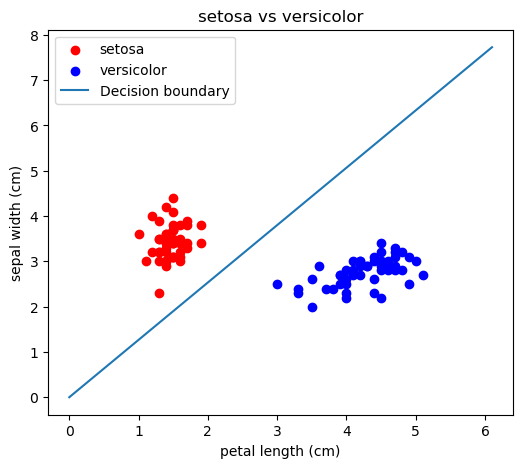

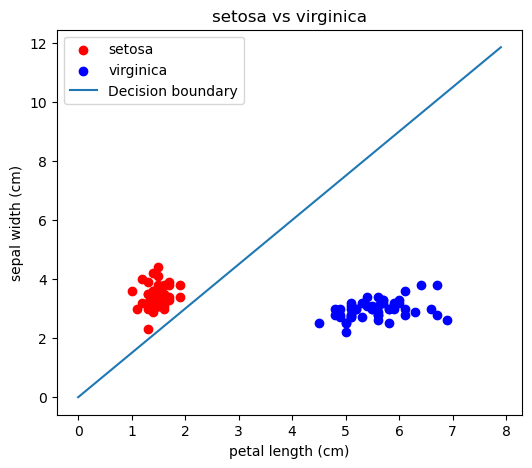

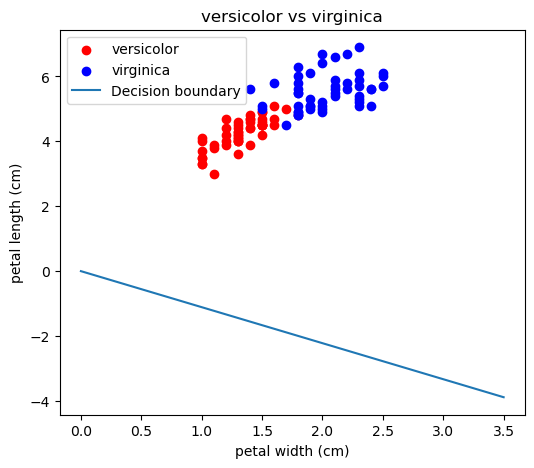

In [113]:
for pair in pairs:
    c1, c2 = pair
    w = weight_vectors[pair]

    best2 = np.argsort(np.abs(w))[-2:][::-1] # select the top 2 features for the pairs 
    f1, f2 = best2 # feature indexs
    f1_name, f2_name = Feature_names[f1], Feature_names[f2]

    mask = np.isin(y, [c1, c2])
    X_pair = X[mask][:, best2] # select only the top 2 features
    y_pair = y[mask]
    #y_pair = np.where(y_pair==c1, 0, 1)
    y_pair = (y_pair != c1).astype(int)
    plt.figure(figsize=(6,5))
    plt.scatter(X_pair[y_pair==0,0], X_pair[y_pair==0,1], color='red', label=iris.target_names[c1])
    plt.scatter(X_pair[y_pair==1,0], X_pair[y_pair==1,1], color='blue', label=iris.target_names[c2])

    # Decision boundary line: f2 = (- b - w1/w2)*f1
    x_vals = np.linspace(X_pair[:,0].min()-1, X_pair[:,0].max()+1, 100)
    y_vals = (-p.b - w[f1]*x_vals)/w[f2]
    plt.plot(x_vals, y_vals, label='Decision boundary')
    plt.xlabel(f1_name)
    plt.ylabel(f2_name)
    plt.title(f"{iris.target_names[c1]} vs {iris.target_names[c2]}")
    plt.legend()
    plt.show()


### 2.5 Multi class classification

Now we are going to consider the three classes of the Iris dataset. Before proceding with the training, we must modify the perceptron to handle multi-class classification. The perceptron can be extended to multi-class classification using the one-vs-all strategy. In this strategy, we train a perceptron for each class, considering it as the positive class and all the other classes as the negative class. Then, we assign the class with the highest score.

Implement the methods `train` and `predict` for the class `MulticlassPerceptron` and remember to load again the Iris dataset, since we need all the classes. Notice that instead of defining three perceptrons or three weights vectors, we can define a single matrix of weights $\boldsymbol{W} \in \mathbb{R}^{\text{n\_classes} \times \text{n\_features}}$. If this disturbs you and you prefer to define three perceptrons, feel free to do so.

In [114]:
class NotImplementedMulticlassPerceptron:
    def __init__(self, n_features, n_classes):
        self.w = np.zeros((n_classes, n_features))
        self.n_classes = n_classes
        
    def predict(self, f):
        raise NotImplementedError

    def train(self, F, y):
        raise NotImplementedError

**Solution [5 Points]**

In [115]:
# TODO
class MulticlassPerceptron:
    def __init__(self, n_features, n_classes):
        self.w = np.zeros((n_classes, n_features))
        self.n_classes = n_classes
        self.b = np.zeros(n_classes)
    def predict(self, f):
        scores = np.dot(self.w, f) + self.b  # shape (n_classes,)
        return np.argmax(scores) # returns index of the predicted class 
        

    def train(self, F, y):
        for i in range(len(F)):
                pred = self.predict(F[i])
                if pred != y[i]:
                    # Update weights for true class
                    self.w[y[i]] += F[i]
                    # Subtract from predicted (wrong) class
                    self.w[pred] -= F[i]
                    self.b[y[i]] += 1          # increase bias for true class
                    self.b[pred] -= 1          # decrease bias for wrong class
                    

In [116]:
# Load Iris dataset again
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
class_names = iris.target_names
# Split into training (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

mp = MulticlassPerceptron(n_features=4, n_classes=3)
#for i in range(10): # training for 30 iterations for better accuracy 
mp.train(X_train, y_train)  # you can add iterations for better accuracy


In [117]:
train_preds = [mp.predict(f) for f in X_train]
test_preds = [mp.predict(f) for f in X_test]
print("Train Accuracy",  accuracy_score(train_preds, y_train))
print("Test Accuracy", accuracy_score(test_preds, y_test))


Train Accuracy 0.9416666666666667
Test Accuracy 0.9
